<a href="https://colab.research.google.com/github/Sammy-Mutua/dsc14b-week-2-IP/blob/main/Samuel_Mutua_DSC14B_Week2_Independent_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Defining The Question**



**a) Specifying the question**

To find out which individuals are most likely to have or use a bank account


**b) Determining the metric of success**



*   Develop a model that would predict which individuals are most likely to have or use a bank account
*    provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

*   providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.






**c) Context of Analysis**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**d) The Experimental Design taken**

1. Defining the question

2. Data Loading

3. Data Understanding

4. Data Preparation

5. Data Analysis (EDA) - Univariate analysis,
Bivariate analysis,
Multivariate analysis.
6. Implementing the solution

7. Challenging the solution

8. Follow up questions

**e) Dataset**


The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.


1.   Variable Definitions -  http://bit.ly/VariableDefinitions
2.   Dataset - http://bit.ly/FinancialDataset



# 2.0 Loading the Data

In [64]:
#Importing pandas 
#
import pandas as pd

#Importing numpy
#
import numpy as np

#Importing seaborn
#
import seaborn as sns

#Importing Matplotlib
#
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('FD.csv')



# 3.0 Checking the Data


In [73]:
# SIZE
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [74]:
# A GLIMPSE
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [75]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [76]:
# NUMERIC FEATURES DESCRIPTION
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [78]:
# Checking for Unique Values
print(df.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


In [79]:
# Checking for unique values in each column
for col in df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

country column unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
**********


year column unique values: 

[2018 2029 2056 2016 2039 2017]
**********


uniqueid column unique values: 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
**********


Has a Bank account column unique values: 

['Yes' 'No' nan]
**********


Type of Location column unique values: 

['Rural' 'Urban' nan]
**********


Cell Phone Access column unique values: 

['Yes' 'No' nan]
**********


household_size column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
**********


Respondent Age column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71. 



1.   Level of education column has 6 incorrect entries.
2.   Household size column has some entries of 0
3.   In the year column there are several year entries greater than 2018



# 4.0 Cleaning the Dataset

In [81]:
# changing column names
df = df.rename(columns={'Has a Bank account':'has_a_bank_account', 'Type of Location':'type_of_location', 'Cell Phone Access':'cellphone_access',  
'Respondent Age':'respondent_age', 'The relathip with head':'relationship_with_head', 'Level of Educuation':'level_of_education', 
'Type of Job':'type_of_job'})
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [82]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [83]:
# Check for white spaces
print(df['country'].str.isspace().sum())
print(df['uniqueid'].str.isspace().sum())
print(df['has_a_bank_account'].str.isspace().sum())
print(df['type_of_location'].str.isspace().sum())
print(df['cellphone_access'].str.isspace().sum())
print(df['gender_of_respondent'].str.isspace().sum())
print(df['relationship_with_head'].str.isspace().sum())
print(df['marital_status'].str.isspace().sum())
print(df['level_of_education'].str.isspace().sum())
print(df['type_of_job'].str.isspace().sum())
print(df.columns.str.isspace().sum())

0
0
0
0
0
0
0
0
0
0
0


In [84]:
# Checking for Missing Values
df.isnull().values.any()

True

In [85]:
# Dealing with Missing Values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cellphone_access          11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64

In [86]:
df.isnull().sum().sum()

267

In [87]:
#Drop missing values as they are minimal
df.dropna(inplace=True)

In [88]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job


In [89]:
# dealing with in-record errors
# 1. Education column
df['level_of_education'] = df['level_of_education'].replace(['6'], np.nan)
df['level_of_education'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

In [90]:
# Dropping year entries that are greater than 2018 which are not the less relevant for our analysis
df = df[df['year']<=2018]

In [91]:
# Drop rows with household size as 0
df.drop(df[df['household_size'] == 0].index, inplace = True)

In [ ]:
# Checking for Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


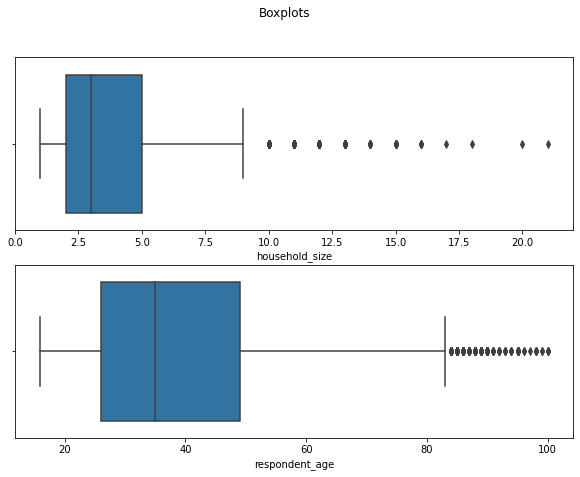

In [22]:
fig, (ax1, ax2)= plt.subplots(2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['respondent_age'], ax=ax2)
plt.show()

# 5.0 Exploratory Data Ananlysis




## 5.1 Univariate Analysis













univariate analysis in general

Text(0, 0.5, 'count')

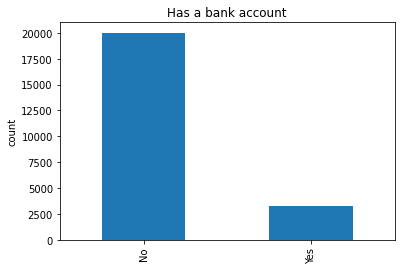

In [25]:
df['has_a_bank_account'].value_counts().plot(kind= 'bar')
plt.title("Has a bank account")
plt.ylabel("count")

Text(0, 0.5, 'Count')

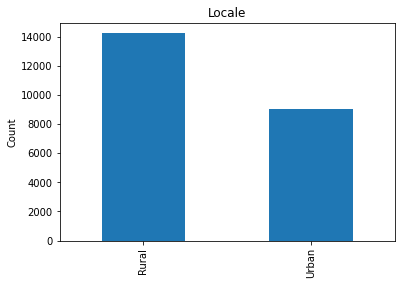

In [26]:
df['type_of_location'].value_counts().plot(kind= 'bar')
plt.title("Locale")
plt.ylabel("Count")

Text(0, 0.5, 'count')

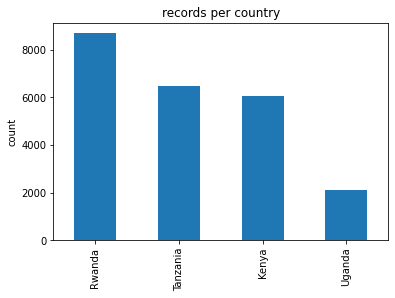

In [27]:
df['country'].value_counts().plot(kind= 'bar')
plt.title("records per country")
plt.ylabel("count")

Text(0, 0.5, 'count')

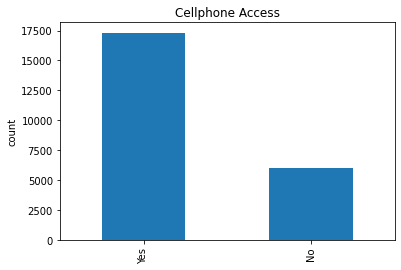

In [28]:
df['cellphone_access'].value_counts().plot(kind= 'bar')
plt.title("Cellphone Access")
plt.ylabel("count")

Text(0, 0.5, 'count')

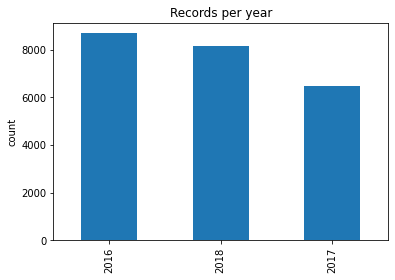

In [29]:
df['year'].value_counts().plot(kind= 'bar')
plt.title("Records per year")
plt.ylabel("count")

Text(0, 0.5, 'count')

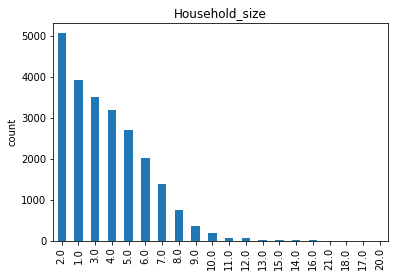

In [30]:
df['household_size'].value_counts().plot(kind= 'bar')
plt.title("Household_size")
plt.ylabel("count")

Text(0, 0.5, 'count')

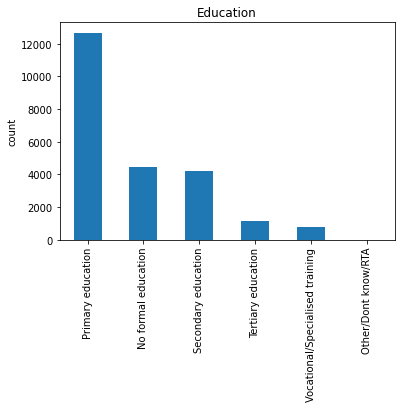

In [31]:
df['level_of_education'].value_counts().plot(kind= 'bar')
plt.title("Education")
plt.ylabel("count")

Text(0, 0.5, 'count')

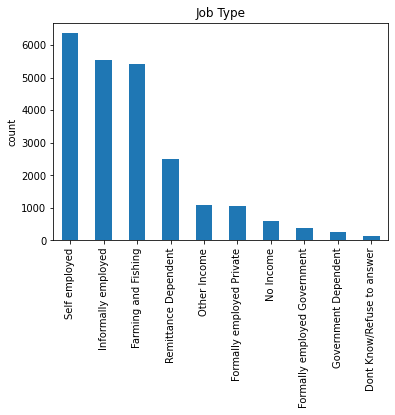

In [32]:
df['type_of_job'].value_counts().plot(kind= 'bar')
plt.title("Job Type")
plt.ylabel("count")

General Observations

1.   Overally, most respondents don't have a bank account or even have access to one.
2.   A higher number of people live in the rural areas than compared to the urban areas.
3.   Quite a number of respondents have access to a cell phone.
4.   A larger percentage of householdsize lies between 2-10, with just a few lying above 10.
5.   Most Respondents have atleast Primary education, a significant number have no formal education or secondary education either, with the least having tertiary education and vocational/specialized training.
6.   Most respondents are have a source of income, with quite a few having no income at all.



Univariate analysis for the specific countries

1. Kenya

In [33]:
# 1. Analysis for Kenya
Kenya_df = df[df['country']=='Kenya']
Kenya_df

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Kenya,2018,uniqueid_6067,No,Rural,Yes,4.0,26.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
6064,Kenya,2018,uniqueid_6068,No,Urban,No,5.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6065,Kenya,2018,uniqueid_6069,No,Rural,Yes,9.0,30.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
6066,Kenya,2018,uniqueid_6070,No,Rural,Yes,3.0,52.0,Male,Head of Household,Married/Living together,Primary education,Self employed


Text(0, 0.5, 'count')

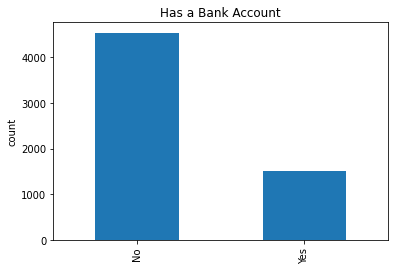

In [34]:
# number of people who have a bank account and those who don't
Kenya_df['has_a_bank_account'].value_counts().plot(kind= 'bar')
plt.title("Has a Bank Account")
plt.ylabel("count")


Text(0, 0.5, 'count')

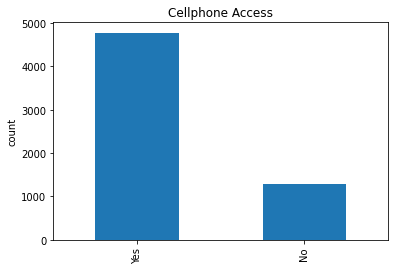

In [35]:
Kenya_df['cellphone_access'].value_counts().plot(kind= 'bar')
plt.title("Cellphone Access")
plt.ylabel("count")

Text(0, 0.5, 'count')

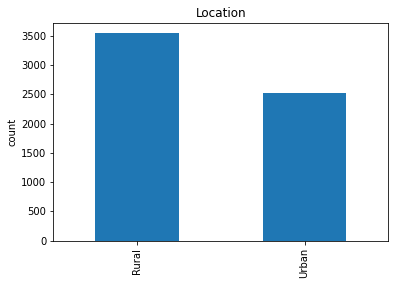

In [36]:
Kenya_df['type_of_location'].value_counts().plot(kind= 'bar')
plt.title("Location")
plt.ylabel("count")

Text(0, 0.5, 'count')

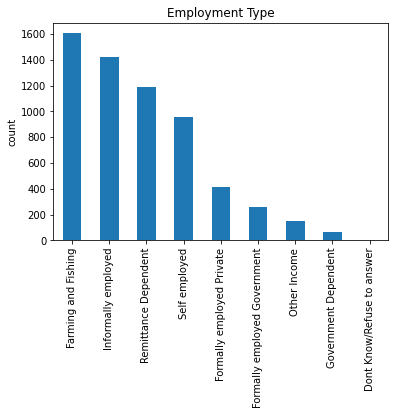

In [37]:
Kenya_df['type_of_job'].value_counts().plot(kind= 'bar')
plt.title("Employment Type")
plt.ylabel("count")

Text(0, 0.5, 'count')

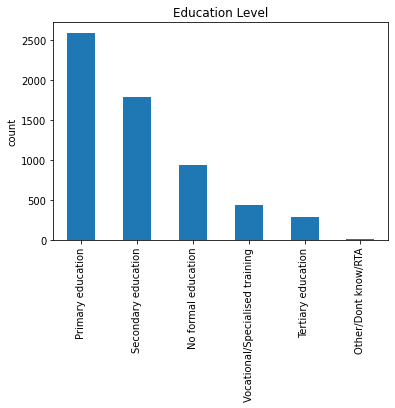

In [38]:
Kenya_df['level_of_education'].value_counts().plot(kind= 'bar')
plt.title("Education Level")
plt.ylabel("count")

Observations from kenya


1.   Most people don't have a bank account or have access to one
2.   A considerable number don't have access to a cellphone
3.   Most people have primary education, followed by secondary education. A considerable have no formal education, and the number decreases significantly when it comes to vocational and tertiary education respectively
4. Most of the population have a source of income
5. A higher number of people lives in the rural areas than compared to urban areas




2. Rwanda

In [39]:
Rwanda_df = df[df['country']=='Rwanda']
Rwanda_df

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7.0,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4.0,26.0,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,uniqueid_3,No,Rural,No,6.0,42.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,uniqueid_4,Yes,Urban,Yes,1.0,41.0,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4.0,17.0,Female,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,Rwanda,2016,uniqueid_8755,No,Rural,Yes,5.0,31.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
14799,Rwanda,2016,uniqueid_8756,No,Rural,No,6.0,49.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
14800,Rwanda,2016,uniqueid_8757,No,Rural,Yes,6.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
14801,Rwanda,2016,uniqueid_8758,No,Rural,Yes,6.0,65.0,Male,Head of Household,Married/Living together,Primary education,Informally employed


Text(0, 0.5, 'count')

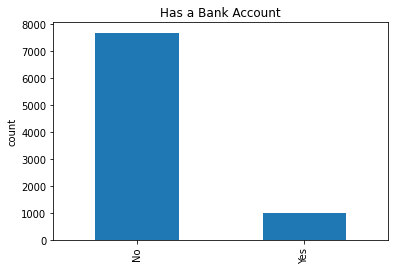

In [40]:
Rwanda_df['has_a_bank_account'].value_counts().plot(kind= 'bar')
plt.title("Has a Bank Account")
plt.ylabel("count")

Text(0, 0.5, 'count')

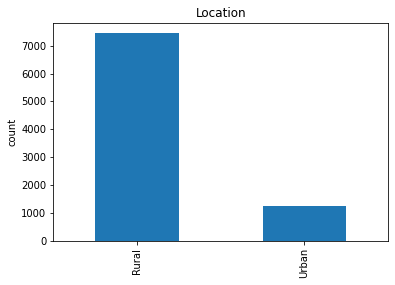

In [41]:
Rwanda_df['type_of_location'].value_counts().plot(kind= 'bar')
plt.title("Location")
plt.ylabel("count")

Text(0, 0.5, 'count')

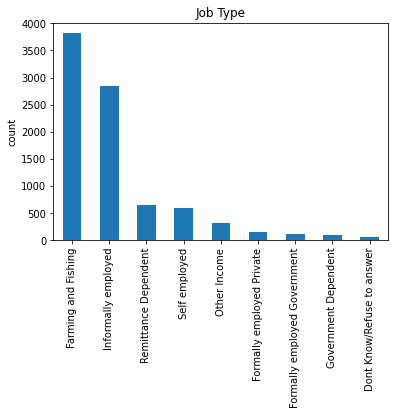

In [42]:
Rwanda_df['type_of_job'].value_counts().plot(kind= 'bar')
plt.title("Job Type")
plt.ylabel("count")

Text(0, 0.5, 'count')

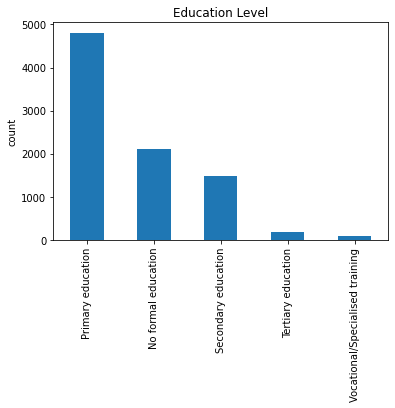

In [43]:
Rwanda_df['level_of_education'].value_counts().plot(kind= 'bar')
plt.title("Education Level")
plt.ylabel("count")

Text(0, 0.5, 'count')

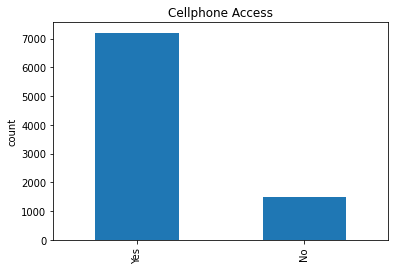

In [44]:
Rwanda_df['cellphone_access'].value_counts().plot(kind= 'bar')
plt.title("Cellphone Access")
plt.ylabel("count")

Observations from Rwanda

1. A higher number of the population don't have a bank account or have access to one 
2.  In Rwanda, most of the respondents live in the rural areas
3. Most of the population depends on farming and fishing, a considerable number are infromally employed while the rest depend on the other sources
4. Education demographics are closely similar to kenya's education demographics
5. Most of the people have access to cell phones, while quite a few don't


3. Tanzania

In [45]:
Tanzania_df = df[df['country']=='Tanzania']
Tanzania_df

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,1.0,22.0,Female,Child,Divorced/Seperated,Secondary education,No Income
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2.0,100.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
14805,Tanzania,2017,uniqueid_3,No,Urban,Yes,3.0,19.0,Female,Head of Household,Widowed,No formal education,No Income
14806,Tanzania,2017,uniqueid_4,No,Urban,No,4.0,21.0,Female,Parent,Single/Never Married,Primary education,Remittance Dependent
14807,Tanzania,2017,uniqueid_5,Yes,Urban,Yes,3.0,24.0,Female,Parent,Divorced/Seperated,Tertiary education,Formally employed Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21418,Tanzania,2017,uniqueid_6633,No,Rural,No,2.0,25.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21419,Tanzania,2017,uniqueid_6634,No,Urban,Yes,2.0,52.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21420,Tanzania,2017,uniqueid_6635,No,Rural,No,5.0,16.0,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
21421,Tanzania,2017,uniqueid_6636,No,Urban,Yes,2.0,48.0,Male,Head of Household,Single/Never Married,Primary education,Self employed


Text(0, 0.5, 'count')

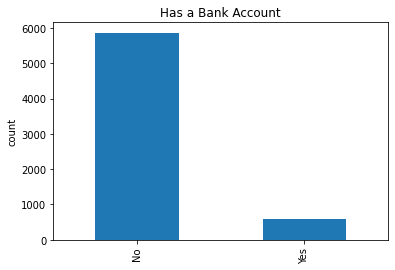

In [46]:
Tanzania_df['has_a_bank_account'].value_counts().plot(kind= 'bar')
plt.title("Has a Bank Account")
plt.ylabel("count")

Text(0, 0.5, 'count')

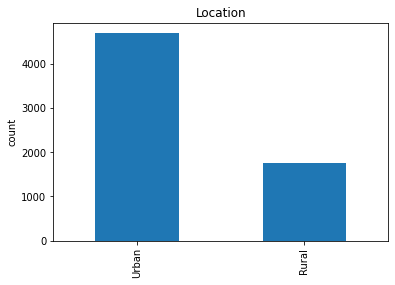

In [47]:
Tanzania_df['type_of_location'].value_counts().plot(kind= 'bar')
plt.title("Location")
plt.ylabel("count")

Text(0, 0.5, 'count')

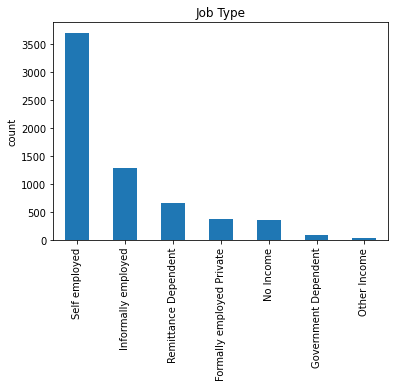

In [48]:
Tanzania_df['type_of_job'].value_counts().plot(kind= 'bar')
plt.title("Job Type")
plt.ylabel("count")

Text(0, 0.5, 'count')

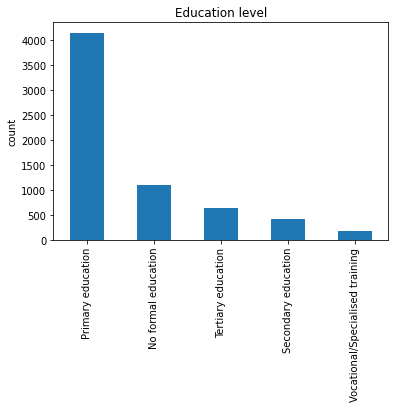

In [49]:
Tanzania_df['level_of_education'].value_counts().plot(kind= 'bar')
plt.title("Education level")
plt.ylabel("count")

Text(0, 0.5, 'count')

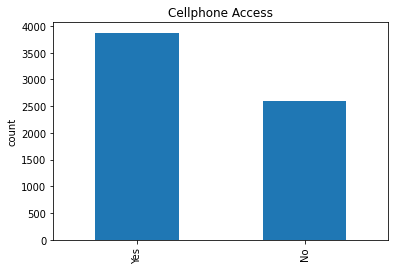

In [50]:
Tanzania_df['cellphone_access'].value_counts().plot(kind= 'bar')
plt.title("Cellphone Access")
plt.ylabel("count")

Observations From Tanzania 


1.  A very large number do not have a bank account or have access to one.
2.  Most of the population lives in the urban areas that compared to the rural  
3. A large number has access to a cellphone, but also a considerable number do not have access to the same
4. Most of the population is dependant on farming and fishing as the main income source, a considerable number is formally employed while the others depend on the other sources of income
5. Most of the population only has primary education



4. Uganda

In [51]:
Uganda_df = df[df['country']=='Uganda']
Uganda_df

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
21423,Uganda,2018,uniqueid_1,No,Rural,No,5.0,32.0,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
21424,Uganda,2018,uniqueid_2,No,Urban,Yes,8.0,65.0,Female,Head of Household,Widowed,Secondary education,Self employed
21425,Uganda,2018,uniqueid_3,No,Rural,No,7.0,35.0,Female,Spouse,Married/Living together,Primary education,Self employed
21426,Uganda,2018,uniqueid_4,No,Rural,No,3.0,25.0,Female,Spouse,Married/Living together,Primary education,Other Income
21427,Uganda,2018,uniqueid_5,No,Urban,Yes,9.0,18.0,Female,Parent,Single/Never Married,Secondary education,Other Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Text(0, 0.5, 'count')

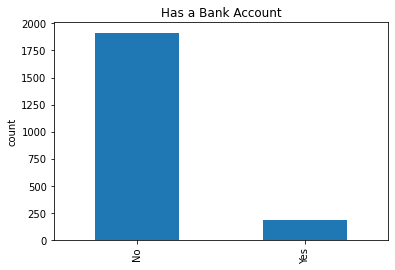

In [52]:
Uganda_df['has_a_bank_account'].value_counts().plot(kind= 'bar')
plt.title("Has a Bank Account")
plt.ylabel("count")

Text(0, 0.5, 'count')

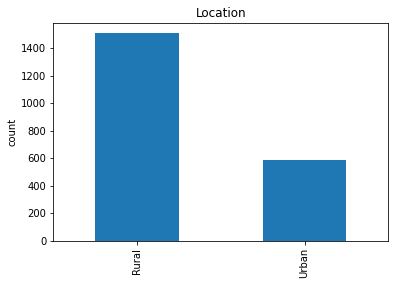

In [53]:
Uganda_df['type_of_location'].value_counts().plot(kind= 'bar')
plt.title("Location")
plt.ylabel("count")

Text(0, 0.5, 'count')

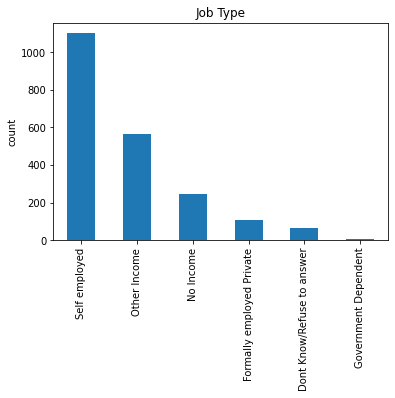

In [54]:
Uganda_df['type_of_job'].value_counts().plot(kind= 'bar')
plt.title("Job Type")
plt.ylabel("count")

Text(0, 0.5, 'count')

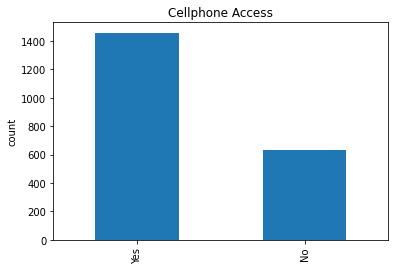

In [55]:
Uganda_df['cellphone_access'].value_counts().plot(kind= 'bar')
plt.title("Cellphone Access")
plt.ylabel("count")

Text(0, 0.5, 'count')

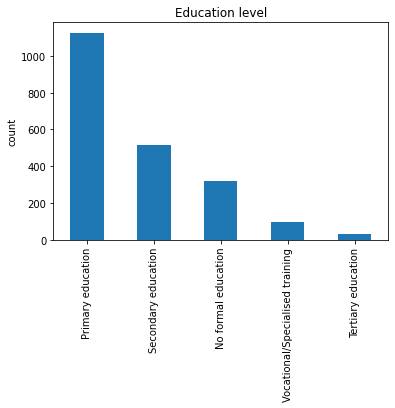

In [56]:
Uganda_df['level_of_education'].value_counts().plot(kind= 'bar')
plt.title("Education level")
plt.ylabel("count")

Uganda Observations


*  Uganda has more or less the same demographics as Tanzania but, the difference comes in location, whereby most people live in rural areas than compared to urban areas




## 5.2 Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

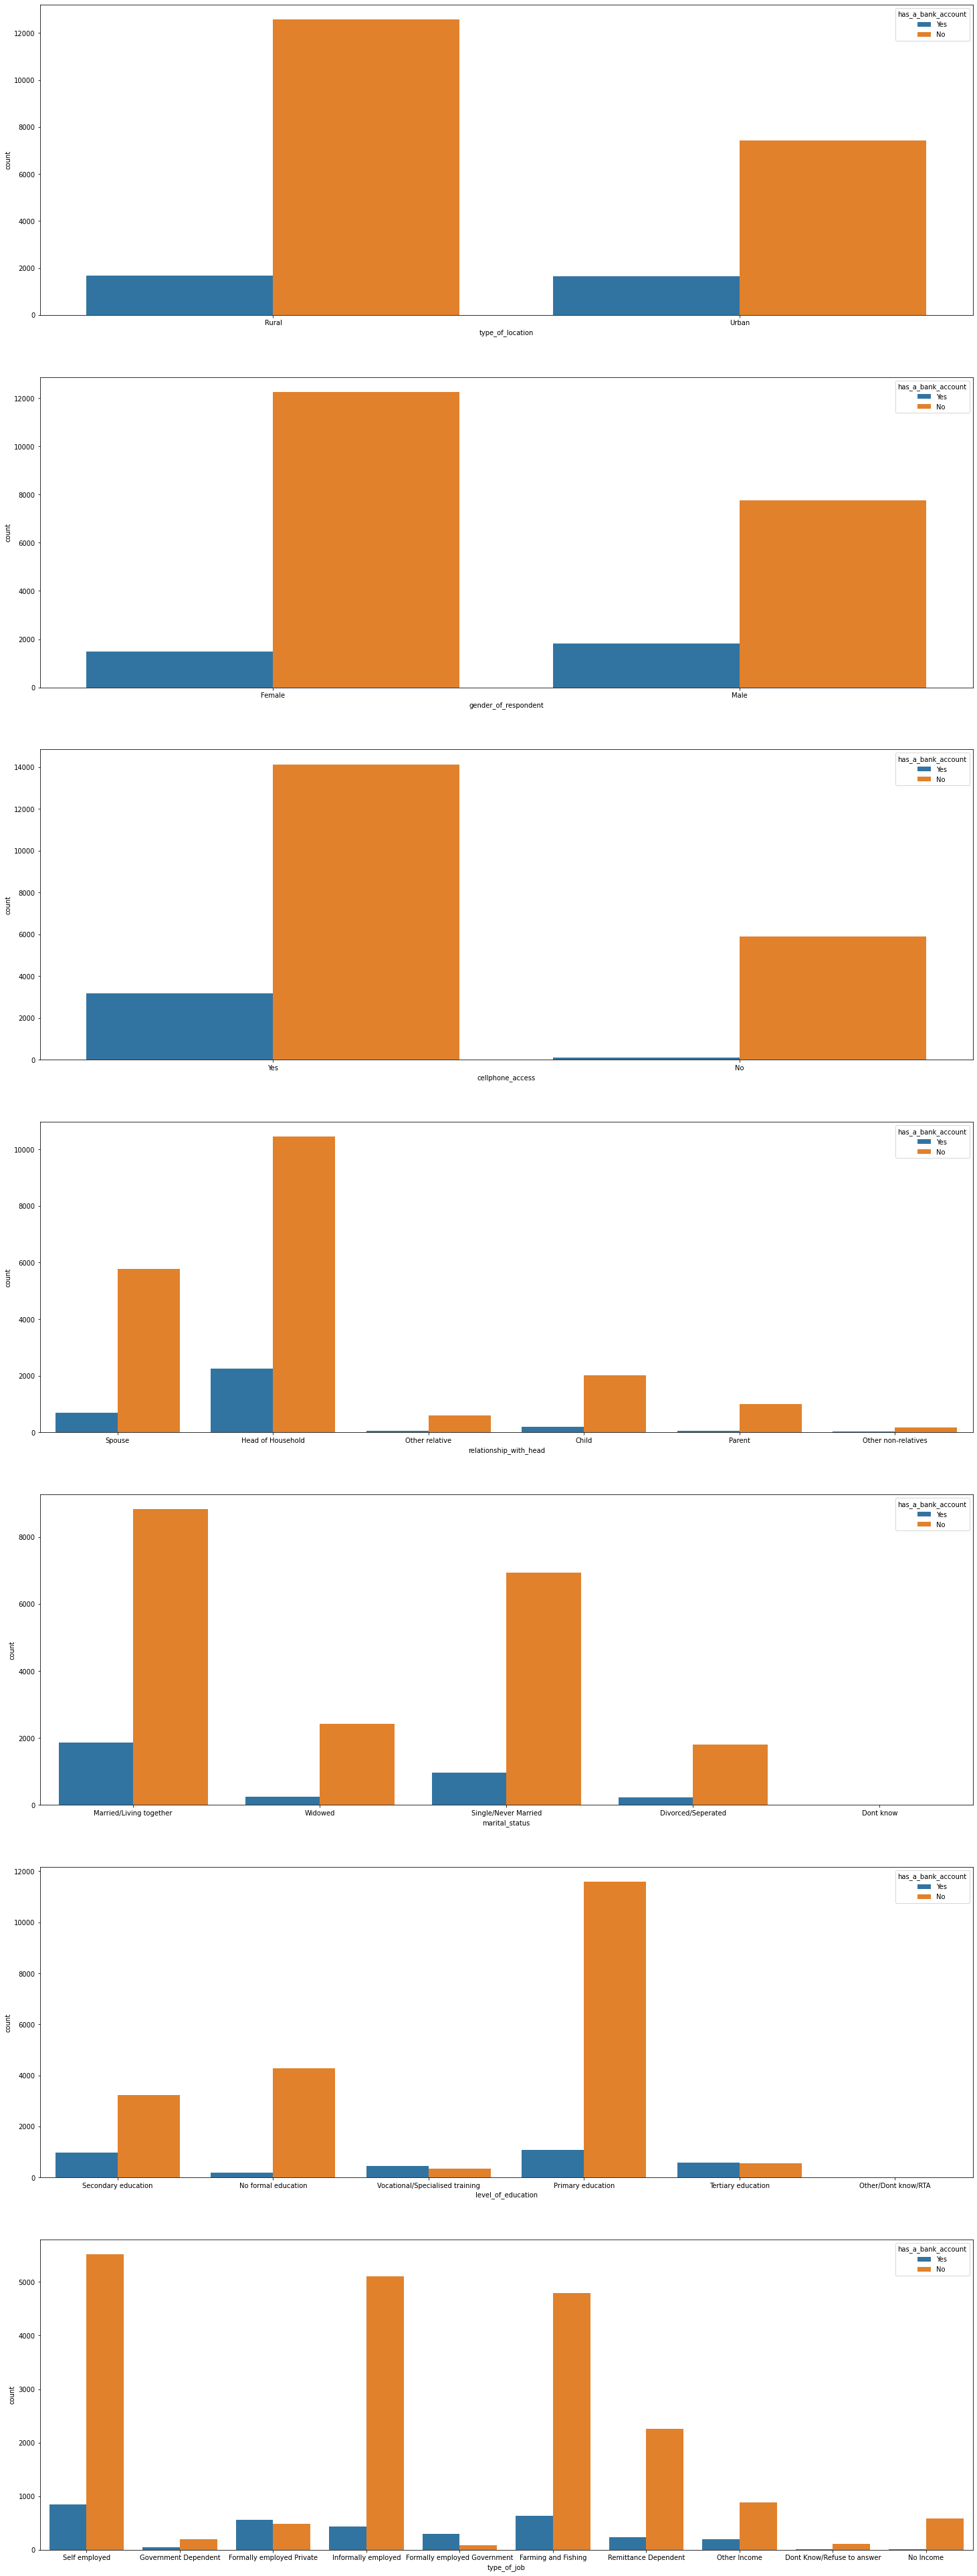

In [57]:
f,axes = plt.subplots(7,1 ,figsize= [25,70])
sns.countplot('type_of_location', hue='has_a_bank_account',data=df, ax=axes[0])
sns.countplot('gender_of_respondent', hue='has_a_bank_account',data=df, ax=axes[1])
sns.countplot('cellphone_access', hue='has_a_bank_account',data=df, ax=axes[2])
sns.countplot('relationship_with_head', hue='has_a_bank_account',data=df, ax=axes[3])
sns.countplot('marital_status', hue='has_a_bank_account',data=df, ax=axes[4])
sns.countplot('level_of_education', hue='has_a_bank_account',data=df, ax=axes[5])
sns.countplot('type_of_job', hue='has_a_bank_account',data=df, ax=axes[6])

Observations Made


1.   A large number of people who live in rural areas don't have a bank account than compared to those who have. This may be because the banks are yet to reach some of the those areas, or better yet the people living in rural areas have not been exposed to the banking services. But the number decreases when it comes to those living in urban areas. This may be due to exposure to banking services in the urban areas.
2.   A larger number of women don't have a bank account than compared to men who don't have bank accounts. This may be due to gender parity issues
3.   A considerable number of people who have access to cellphones also have a bank accounts. This may be due to the growth of mobile banking services in the region
4.   When it comes to relationship with the head of the house, a significant number who were either the head of the house and the spouse were found to have a bank account while the rest make a small number of those who have a bank account
5.   In terms of marital status, those married/ living together are slightly likely to have a bank account, followed by those who are single and never married. Those who are divorced and widowed are more likely to have a bank account than the rest.
6.   Those who have vocational/specialised training, tertiary education are more likely to have a bank account, while those who have only gone through primary and secondary school are more or less unlikely to have a bank account.
7.   A slightlty higher number of people who are self employed are likely to have a bank account, followed by those who are engaged in farming and fishing and are formally employed private respectively. 


In [97]:
# corelation matrix
# first we convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['level_of_education'] = en.fit_transform(df['level_of_education'])
df['type_of_job'] = en.fit_transform(df['type_of_job'])
df['relationship_with_head'] = en.fit_transform(df['relationship_with_head'])
df['cellphone_access'] = en.fit_transform(df['cellphone_access'])
df['gender_of_respondent'] = en.fit_transform(df['gender_of_respondent'])
df['gender_of_respondent'] = en.fit_transform(df['gender_of_respondent'])
df['marital_status'] = en.fit_transform(df['marital_status'])
df['has_a_bank_account'] = en.fit_transform(df['has_a_bank_account'])
df['type_of_location'] = en.fit_transform(df['type_of_location'])
df








,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,1,0,1,3.0,24.0,0,5,2,3,9
1,Kenya,2018,uniqueid_2,0,0,0,5.0,70.0,0,1,4,0,4
2,Kenya,2018,uniqueid_3,1,1,1,5.0,26.0,1,3,3,5,9
3,Kenya,2018,uniqueid_4,0,0,1,5.0,34.0,0,1,2,2,3
4,Kenya,2018,uniqueid_5,0,1,0,8.0,26.0,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4.0,48.0,0,1,0,0,7
23520,Uganda,2018,uniqueid_2114,0,0,1,2.0,27.0,0,1,3,3,7
23521,Uganda,2018,uniqueid_2115,0,0,1,5.0,27.0,0,4,4,2,7
23522,Uganda,2018,uniqueid_2116,0,1,1,7.0,30.0,0,4,0,3,9


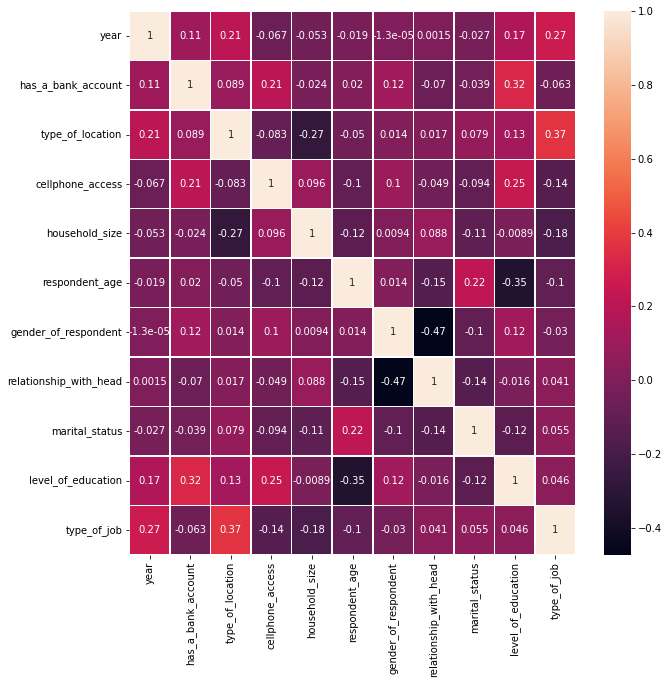

In [98]:
corrMatrix = df.corr()
corrMatrix


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

Observations


*   Having a bank account has a low positive correlation to gender, age, type of location and 


* Level of Education and Cellphone Access have the highest correlation to having a bank account


*   Having a bank account has a low negative correlation to the columns of type of job, marital status, relationship with head, household size and country




## 5.3 Multivariate Analysis

In [99]:
# we shall use LDA-(Linear Discriminant Analysis) since our data has a label, that has classes
# 1. Separating our target label(has a bank account) from other features
feat = df.drop(['has_a_bank_account','country','year','uniqueid'], 1)
bank_label = df['has_a_bank_account']
feat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,0,1,3.0,24.0,0,5,2,3,9
1,0,0,5.0,70.0,0,1,4,0,4
2,1,1,5.0,26.0,1,3,3,5,9
3,0,1,5.0,34.0,0,1,2,2,3
4,1,0,8.0,26.0,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...
23519,0,1,4.0,48.0,0,1,0,0,7
23520,0,1,2.0,27.0,0,1,3,3,7
23521,0,1,5.0,27.0,0,4,4,2,7
23522,1,1,7.0,30.0,0,4,0,3,9


In [100]:
# Import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# creating an instance of LDA
lda = LDA()

lda_= lda.fit(feat, bank_label)
lda_feat = lda_.transform(feat)

# displaying the coefficients of the reducted columns in a dataframe
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
cellphone_access,1.038392
level_of_education,0.902840
type_of_location,0.648120
gender_of_respondent,0.348689
respondent_age,0.029463
household_size,-0.009968
relationship_with_head,-0.024335
marital_status,-0.066067
type_of_job,-0.083156


Conclusion
*   As per our analysis, we can use a linear combination of the following features to comfortably predict if an inividual has a bank account;


1.  Cellphone Access
2.  Level of education
3.  Type of Location
4.   Gender of Respondent
5.   Respondent Age





# 6.0 Recommendations and Conlusions

A. Conclusions


*  The factors highly affecting having a bank account or having access to one, include cellphone Access, Level of Education, Type of location, gender of respondent and Age



B. Recommendation


*   Use the factors stated above inorder to build a model that would correctly predict which indiduals are most likely to have a bank account or have access to one

